In [1]:
import pandas as pd

df = pd.read_csv("data/energy_consumption.csv")
df.head()

,Temperature,Humidity,Usage_Hours,Energy_Consumption
0,24.363503,33.100903,4.885506,49.885685
1,38.767858,61.881278,7.407578,74.218302
2,33.299849,62.438107,5.071241,75.157170
3,29.966462,68.245794,3.040158,64.771952
4,18.900466,73.565480,3.774625,58.726060


In [ ]:
"""(xi​,yi​)=([Ti​,Hi​,Ui​], Ei​)
Where:

𝑇
T = Temperature

𝐻
H = Humidity

𝑈
U = Usage Hours

𝐸
E = Energy Consumption (target)

Number of samples: 
𝑛
n
Number of features: 
𝑑
=
3
d=3"""


'(xi\u200b,yi\u200b)=([Ti\u200b,Hi\u200b,Ui\u200b], Ei\u200b)'

In [3]:
"""Model defination= Linear SVR Model"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/energy_consumption.csv")

X = df[["Temperature", "Humidity", "Usage_Hours"]].values
y = df["Energy_Consumption"].values

In [4]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_scaled = (X - X_mean) / X_std

In [5]:
n_features = X_scaled.shape[1]

w = np.zeros(n_features)
b = 0.0

C = 1.0
epsilon = 2.0
lr = 0.01
epochs = 300

In [6]:
loss_history = []

for epoch in range(epochs):
    dw = w.copy()      # gradient of 0.5 * ||w||²
    db = 0.0
    total_loss = 0.0
    
    for xi, yi in zip(X_scaled, y):
        y_pred = np.dot(w, xi) + b
        error = yi - y_pred
        
        if abs(error) > epsilon:
            total_loss += abs(error) - epsilon
            
            if error > 0:
                dw -= C * xi
                db -= C
            else:
                dw += C * xi
                db += C
    
    # update parameters
    w -= lr * dw
    b -= lr * db
    
    # full objective value
    objective = 0.5 * np.dot(w, w) + C * total_loss
    loss_history.append(objective)

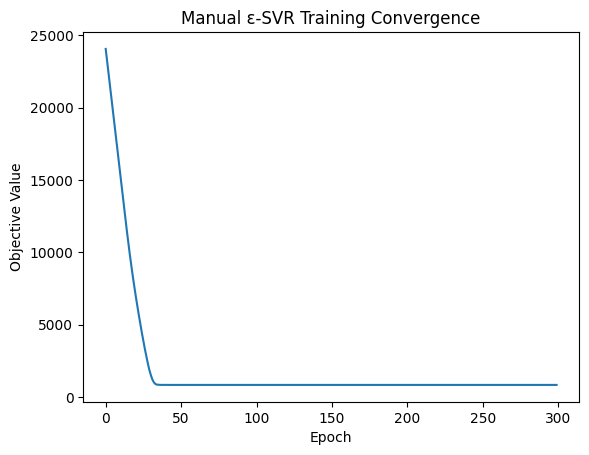

In [7]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Objective Value")
plt.title("Manual ε-SVR Training Convergence")
plt.show()

In [8]:
y_pred = X_scaled @ w + b
errors = np.abs(y - y_pred)

support_vectors = errors > epsilon
support_vectors.sum()

np.int64(206)

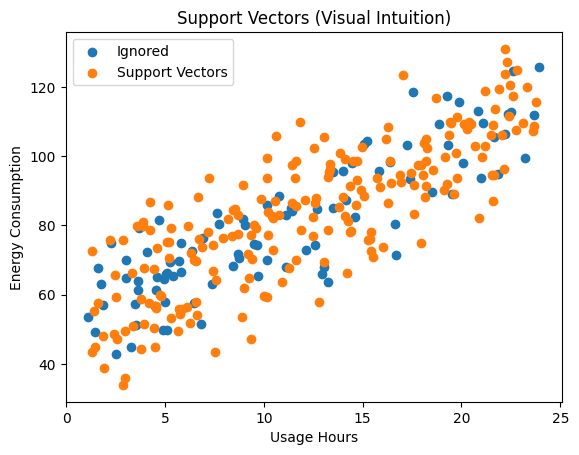

In [9]:
plt.scatter(
    df["Usage_Hours"][~support_vectors],
    y[~support_vectors],
    label="Ignored"
)

plt.scatter(
    df["Usage_Hours"][support_vectors],
    y[support_vectors],
    label="Support Vectors"
)

plt.xlabel("Usage Hours")
plt.ylabel("Energy Consumption")
plt.title("Support Vectors (Visual Intuition)")
plt.legend()
plt.show()

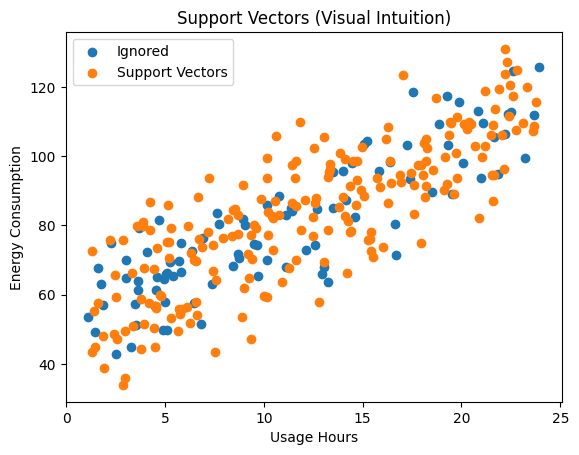

In [10]:
plt.scatter(
    df["Usage_Hours"][~support_vectors],
    y[~support_vectors],
    label="Ignored"
)

plt.scatter(
    df["Usage_Hours"][support_vectors],
    y[support_vectors],
    label="Support Vectors"
)

plt.xlabel("Usage Hours")
plt.ylabel("Energy Consumption")
plt.title("Support Vectors (Visual Intuition)")
plt.legend()
plt.show()

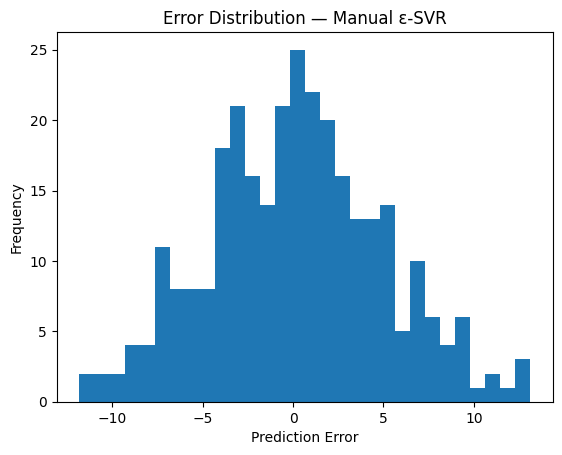

In [11]:
y_pred_svr = X_scaled @ w + b
mae = np.mean(np.abs(y - y_pred_svr))
mae
mse = np.mean((y - y_pred_svr) ** 2)
mse
errors = y - y_pred_svr

plt.hist(errors, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution — Manual ε-SVR")
plt.show()

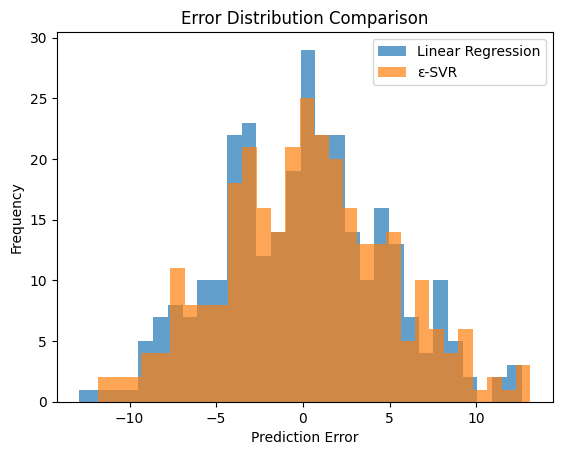

In [12]:
# add bias term
X_lr = np.c_[np.ones(len(X_scaled)), X_scaled]

# closed-form OLS
theta = np.linalg.inv(X_lr.T @ X_lr) @ X_lr.T @ y

b_lr = theta[0]
w_lr = theta[1:]

y_pred_lr = X_scaled @ w_lr + b_lr
plt.hist(y - y_pred_lr, bins=30, alpha=0.7, label="Linear Regression")
plt.hist(y - y_pred_svr, bins=30, alpha=0.7, label="ε-SVR")

plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution Comparison")
plt.legend()
plt.show()

In [13]:
support_ratio = support_vectors.sum() / len(y)
support_ratio

np.float64(0.6866666666666666)

In [14]:
pd.Series(w, index=["Temperature", "Humidity", "Usage_Hours"])

Temperature     5.888690
Humidity        8.872273
Usage_Hours    16.022075
dtype: float64